# 🧪 Data Visualization on Diabetes Prediction Dataset


#### 📉 Exploring Feature Distributions, Symptom Patterns, and Class Imbalance


### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Loading and Previewing the Dataset

In this section, we load the diabetes prediction dataset and preview its initial rows to get a general understanding of its structure.


In [2]:

# Load the dataset
data = pd.read_csv('diabetes_data.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1



## Basic Data Information

### Data Types and Missing Values
Here, we examine the data types of each feature and check for any missing values that need to be addressed.


In [3]:
# Check data types and missing values
print("Data Types and Missing Values:")
print(data.dtypes.astype(str) + " | Missing: " + data.isnull().sum().astype(str))


Data Types and Missing Values:
age                    int64 | Missing: 0
gender                object | Missing: 0
polyuria               int64 | Missing: 0
polydipsia             int64 | Missing: 0
sudden_weight_loss     int64 | Missing: 0
weakness               int64 | Missing: 0
polyphagia             int64 | Missing: 0
genital_thrush         int64 | Missing: 0
visual_blurring        int64 | Missing: 0
itching                int64 | Missing: 0
irritability           int64 | Missing: 0
delayed_healing        int64 | Missing: 0
partial_paresis        int64 | Missing: 0
muscle_stiffness       int64 | Missing: 0
alopecia               int64 | Missing: 0
obesity                int64 | Missing: 0
class                  int64 | Missing: 0
dtype: object



## Check for Duplicate Data

This step identifies any duplicate rows in the dataset, as they may affect the analysis and predictions.


In [4]:
# Checking for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows if any
if duplicate_count > 0:
    print("Duplicate rows:")
    display(data[data.duplicated()])

    # Removing duplicates
    data = data.drop_duplicates()


Number of duplicate rows: 269
Duplicate rows:


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
84,35,Female,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38,Female,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28,Female,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47,Male,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64,Male,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0



## Descriptive Statistics

This section provides summary statistics for the numerical features in the dataset, giving insights into their distributions and ranges.


In [5]:

# Summary statistics for numerical features
data.describe()


,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,12.526036,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



1. Age Distribution: The dataset has a wide age range (16-90) with a mean age of 49, centered around middle-aged individuals.

2. Common Symptoms: Polyuria, polydipsia, and weakness are more prevalent symptoms, each present in about half or more of the participants.

3. Less Common Symptoms: Genital thrush, obesity, and alopecia have lower frequencies, making them less common among participants.

4. Diabetes Class Imbalance: About 69% of the participants are diabetic, indicating a class imbalance that may need correction for modeling.

5. Binary Feature Spread: Most binary symptoms have a balanced distribution with standard deviations around 0.5, indicating variability in symptom presence.

6. Implications for Modeling: High-prevalence symptoms may serve as strong predictors. The class imbalance suggests a need for techniques like oversampling or undersampling to achieve balanced training data.


## Target Variable Distribution

Let's examine the distribution of the target variable, representing diabetes classification (`class`), to understand the balance between diabetic and non-diabetic individuals.


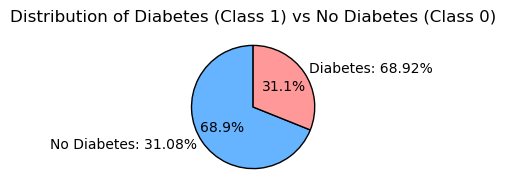

In [6]:

# Distribution of the target variable
# Count and percentage for the target variable
class_counts = data['class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Plotting a pie chart
plt.figure(figsize=(4, 2))
plt.pie(class_counts, labels=[f"No Diabetes: {class_percentages[0]:.2f}%", 
                              f"Diabetes: {class_percentages[1]:.2f}%"], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Diabetes (Class 1) vs No Diabetes (Class 0)')
plt.show()


Distribution of Diabetes (Class 1) vs No Diabetes (Class 0): The pie chart indicates that a higher percentage of the population represented in this dataset has diabetes (Class 1) at 68.9%, while 31.1% does not have diabetes (Class 0). This suggests that diabetes is prevalent in this sample group.


## Univariate Analysis

We analyze individual features, focusing on the distributions of age and gender.



### Age Distribution


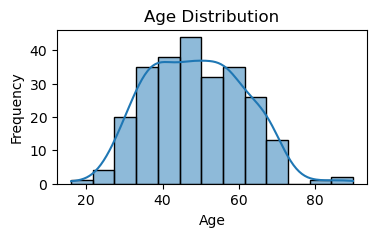

In [7]:

import seaborn as sns

# Age distribution plot
plt.figure(figsize=(4, 2))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Age Distribution: The histogram of age shows a roughly normal distribution, with the majority of individuals between ages 30 and 60. This suggests that the dataset mainly consists of middle-aged adults, with fewer young and older individuals.


### Gender Distribution


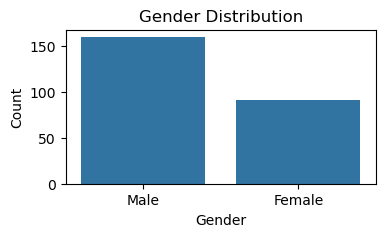

Gender Distribution:
Male: Count = 160, Percentage = 63.75%
Female: Count = 91, Percentage = 36.25%


In [8]:

# Bar plot for gender distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Displaying counts and percentages
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: Count = {count}, Percentage = {gender_percentages[gender]:.2f}%")


Gender Distribution: The bar chart shows that males make up a larger portion of the dataset than females. This implies a potential gender imbalance, which may affect the analysis if gender-related trends are being studied.


## Bivariate Analysis

This section examines relationships between the target variable and individual features.



### Age Distribution by Diabetes Classification


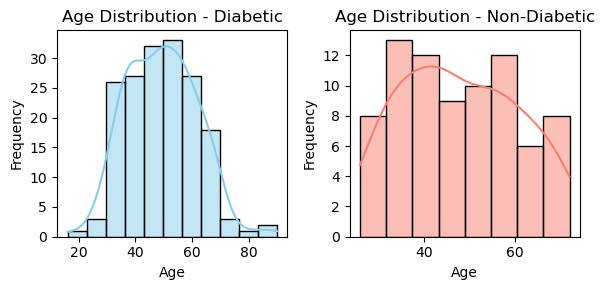

In [9]:

# Age distribution by diabetes classification
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

plt.figure(figsize=(6, 3))

# Diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], kde=True, color='skyblue')
plt.title("Age Distribution - Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], kde=True, color='salmon')
plt.title("Age Distribution - Non-Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




1. Diabetic Age Group: Most diabetic cases are between ages 40 and 70, suggesting a higher prevalence in middle-aged to older adults.

2. Normal Distribution: Diabetic age distribution resembles a bell curve, indicating a central tendency in older age groups.

3. Non-Diabetic Spread: Non-diabetic cases are more evenly spread across ages, with peaks around 30, 50, and 60.

4. Age as a Risk Factor: Age likely influences diabetes risk, with older individuals at higher risk.

5. Modeling Insight: Age appears significant for predicting diabetes, given the distinct distributions between groups.

## Diebitic Class v/s Gender Distribution

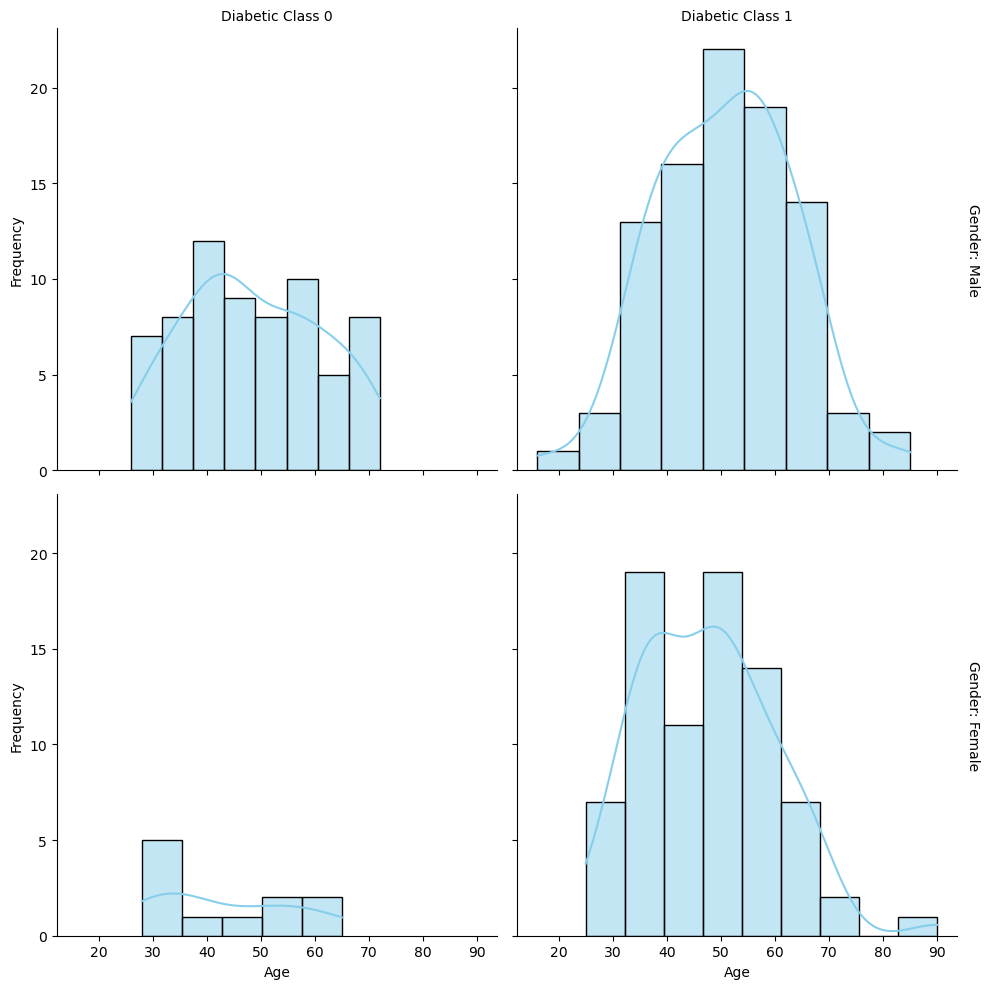

In [10]:

# Create a FacetGrid to explore multiple symptoms across 'class' and 'gender'
g = sns.FacetGrid(data, col='class', row='gender', margin_titles=True, height=5)

# Plot histograms for selected symptoms (e.g., 'polyuria', 'polydipsia', 'age') within each facet
g.map(sns.histplot, 'age', kde=True, color='skyblue')

# Add titles and labels
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='Diabetic Class {col_name}', row_template='Gender: {row_name}')

# Show the plot
plt.tight_layout()
plt.show()



Diabetes is more prevalent in middle-aged males (40-60) and females (30-60).

Screening efforts could focus on these age groups for early detection.

### Key Observations:

1. Class Imbalance: The dataset has more diabetic cases (~69%), which may bias predictive models unless corrected.

2. Prevalent Symptoms: Some symptoms like polyuria and polydipsia are common and might be strong predictors.

3. Data Quality: The dataset had duplicates but no missing values.

### Conclusion:

The notebook provides a clean and well-structured data visualization on a diabetes dataset. The dataset is ready for preprocessing and modeling, but the class imbalance must be addressed using methods such as SMOTE (oversampling), undersampling, or using class weights in models. The initial analysis offers useful insights into symptom prevalence and age distribution that could significantly inform the feature engineering and model-building steps that follow.